## Capstone Project - Car accident severity (Greater Manchester)
![alt text](https://i2-prod.examinerlive.co.uk/incoming/article8979408.ece/ALTERNATES/s1227b/JS60500612.jpg "Accident on Leeds")
[Source-examinerlive.co.uk](https://www.examinerlive.co.uk/news/gallery/accident-on-leeds-road-8975504?utm_source=linkCopy&utm_medium=social&utm_campaign=sharebar) 

### 1.	Introduction
#### 1.1.	Background
In one of our Friday bar trivia, one of my friends had an interesting comment on Road Accident she said, “what if there is no road or any vehicle in the road then there will be no road accident”. Isn’t a simple solution! well at that time some argued with her, “this is impossible, we need road and vehicle, etc. for doing so and so.”
But during the Covid19 pandemic and locked down period, I realized it was indeed a reality though not 100% but since travel was stopped and vehicles were grounded the number of accidents was nearly null or at least much less compared to before locked down. Isn’t it an intriguing observation then stopping the travel or extending lockdown will reduce or stopped road accidents? 
#### 1.2.	Problem
I know many of you will not agree with the above paradigm. Well then, we have a problem at hand i.e. how do we minimize road accidents or fatalities or severity of it. Would we create a machine learning model to predict accident severity and then use this prediction to solve some of the practical real-life problems? However, questions arise how accurate we will be in the prediction, and will prediction stop an accident or why would someone adhere to this prediction. 
Well in that case there is no definite solution or methodology.  Also, it is not a new topic. There are many kinds of research done in past and there are many ongoing and there will be many in the future.
So not getting into a deep study, I will focus on accident severity and use some of the data science techniques to come up with some observations such as the correlation of severity with other features like location, road type, road condition, weather, etc.
In the second part, I will try to build a machine learning model that can be used to predict accident severity based on related attributes.
#### 1.3.	Interested Parties
Now, the obvious question is who would be interested in finding accident severity and its prediction accuracy. Honestly speaking, probably some of the Capstone project participants or curious data science followers may be interested to read it.  Nevertheless, my best effort will be to reach out to the following audiences by this project. 
1. Tourists and travelers who are self-driving and using a rent a car option. They are new to those places and want beforehand information such as which insurance to choose during booking, or which road to choose or which spot to choose based on accident severity prediction. 
2. Rent a car company, they will use this research and advise the tourist. Or make a recommendation of car type, insurance or accessories, etc. for travel.
3. Insurance companies, they can use this research to come up with new product offering or decide on pricing or claim settlement planning or doing further research.
4. Government agencies can use this information to come up with various road safety measures

### 2. Data Sources
I have chosen data available in the following public domain.

[Source](https://data.gov.uk/dataset/gm-road-casualty-accidents-full-stats19-data)

It has Information on accidents across Greater Manchester in the UK from the period 2010 until 2019. Data is available in CSV format. The volume of data is around 40,000. These data include many fields such as location, number of people and vehicles involved, road surface, weather conditions, the severity of any casualties, speed limit, etc. There is also a general guidance file which has details about metadata.

There is some general comment about this dataset by the owner(Greater Manchester City Council) i.e. some of the location-specific data like “Eastings” and “Northing” may not be 100% accurate due to poor internet connectivity.  Also, there are repeated rows for specific columns. Nevertheless, we will deep dive into data and various cleaning processes in the ‘Data Cleaning and exploration’ step.

The __STATS19AccData20102019.csv__ data set includes 27 fields, many of them are self-explanatory. Following are some key fields and the description:

| Field                      | Description                                                                          | 
|----------------------------|--------------------------------------------------------------------------------------|
| Accident Severity          | Severity type such as Fatal,Serious,or Light                                         |
| Road Class & Number        | UK numbering scheme to classify and identify all roads in Great Britain.             |       
| Road or Carriageway Type   | Road type for example- round about,single or dual Carriageway, slip road etc.        |       
| Pedestrian Crossing        | Crossing type for example Zebra crossing,Footbridge or subway etc                    |
| Special Conditions at Site | Example - Auto traffic signal out,Roadworks ,Oil or diesel resulting accident        |       
| Light Conditions           | Example - Daylight,Darkness(no street lighting,light  unlit or lit etc)              |     
| Carriageway Hazards        | Example - Dislodged vehicle load in carriageway, animal or human in carriageway etc. |  

Lets first load required libraries:

In [1]:
#Importing Modules
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
import urllib.request
##ML libraries
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score 
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%matplotlib inline

#### 2.1. Lets load Data From CSV File  

In [2]:
# Download files from `url` and save it locally under `file_name`:
urllib.request.urlretrieve('http://odata.tfgm.com/opendata/downloads/STATS19VehData20102019.csv','VehData20102019.csv')
urllib.request.urlretrieve('http://odata.tfgm.com/opendata/downloads/STATS19AccData20102019.csv','AccData20102019.csv')
urllib.request.urlretrieve('http://odata.tfgm.com/opendata/downloads/STATS19CasData20102019.csv','CasData20102019.csv')

('CasData20102019.csv', <http.client.HTTPMessage at 0x291e105fc40>)

In [3]:
#read data to dataframe
df_veh = pd.read_csv('VehData20102019.csv',encoding='mac_roman')
df_acc = pd.read_csv('AccData20102019.csv',encoding='mac_roman')
df_cas = pd.read_csv('CasData20102019.csv',encoding='mac_roman')

#### 2.2 Data pre-processing and visualization

Let's take a glimpse of the data set.

In [4]:
#print Vechile data
df_veh.head()

,Accident Index,Year,VehicleReferenceNumber,VehicleType,ArtTowing,Manoeuvre,VehicleLocationOffRoad,JunctionLocation,Skidding,HitObjectOnCWay,VehicleLeaveCWay,HitObjectOffCWay,FirstPointImpact,JourneyPurpose,ForeignReg,SexOfDriver,AgeBandOfDriver
0,1.002600e+11,2010,1,9,0,13,0,0,0,0,0,0,0,5,0,3,7
1,1.002600e+11,2010,2,17,0,18,0,0,0,0,0,0,0,5,0,3,7
2,1.002600e+11,2010,3,9,0,18,0,0,1,0,0,0,1,5,0,1,7
3,1.002600e+11,2010,4,9,0,18,0,0,0,0,0,0,1,5,0,1,6
4,1.002620e+11,2010,1,9,0,7,0,8,1,7,0,7,1,5,0,1,4


In [5]:
#let's convert Accident Index field to string format for matching
df_veh['Accident Index'] = df_veh['Accident Index'].apply(lambda x: '%.12f' % x)
df_veh['Accident Index'] =df_veh['Accident Index'].str[0:12]

In [6]:
df_veh.head()

,Accident Index,Year,VehicleReferenceNumber,VehicleType,ArtTowing,Manoeuvre,VehicleLocationOffRoad,JunctionLocation,Skidding,HitObjectOnCWay,VehicleLeaveCWay,HitObjectOffCWay,FirstPointImpact,JourneyPurpose,ForeignReg,SexOfDriver,AgeBandOfDriver
0,100260000000,2010,1,9,0,13,0,0,0,0,0,0,0,5,0,3,7
1,100260000000,2010,2,17,0,18,0,0,0,0,0,0,0,5,0,3,7
2,100260000000,2010,3,9,0,18,0,0,1,0,0,0,1,5,0,1,7
3,100260000000,2010,4,9,0,18,0,0,0,0,0,0,1,5,0,1,6
4,100262000000,2010,1,9,0,7,0,8,1,7,0,7,1,5,0,1,4


In [7]:
#print casuality dta
df_cas.head()

,Accident Index,Year,VehicleReferenceNumber,CasualtyNumber,CasualtyClass,Sex,AgeBandOfCasualty,CasualtySeverity,PedLocation,PedMovement,CarPassenger,BusPassenger,PedInjWork,CasTypeCode
0,1.002600e+11,2010,3,1,1,1,7,3,0,0,0,0,0,9
1,1.002600e+11,2010,4,2,1,1,6,3,0,0,0,0,0,9
2,1.002600e+11,2010,4,3,2,1,2,3,0,0,2,0,0,9
3,1.002600e+11,2010,4,4,2,2,1,3,0,0,2,0,0,9
4,1.002620e+11,2010,1,1,1,1,4,3,0,0,0,0,0,9


In [8]:
#let's convert Accident Index field to string format for join
df_cas['Accident Index'] = df_cas['Accident Index'].apply(lambda x: '%.12f' % x)
df_cas['Accident Index'] =df_cas['Accident Index'].str[0:12]

In [9]:
#let's check data after convertion
df_cas.head()

,Accident Index,Year,VehicleReferenceNumber,CasualtyNumber,CasualtyClass,Sex,AgeBandOfCasualty,CasualtySeverity,PedLocation,PedMovement,CarPassenger,BusPassenger,PedInjWork,CasTypeCode
0,100260000000,2010,3,1,1,1,7,3,0,0,0,0,0,9
1,100260000000,2010,4,2,1,1,6,3,0,0,0,0,0,9
2,100260000000,2010,4,3,2,1,2,3,0,0,2,0,0,9
3,100260000000,2010,4,4,2,2,1,3,0,0,2,0,0,9
4,100262000000,2010,1,1,1,1,4,3,0,0,0,0,0,9


In [10]:
#print accident data
df_acc.head()

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,Easting,Northing,...,Road2Class,Road2Number,PedCrossingHumanControl,PedCrossingPhysicalFacilities,LightingCondition,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported
0,102262412010,2010,3,2,1,01/01/2010,6,13:10,382347,390025,...,3,5103,0,0,1,1,4,0,0,1
1,102262562010,2010,3,2,1,01/01/2010,6,11:10,381892,390582,...,7,0,0,0,1,1,4,0,0,1
2,102264322010,2010,3,2,1,01/01/2010,6,17:30,385840,403134,...,7,0,0,0,4,1,2,0,0,2
3,107264182010,2010,3,3,1,01/01/2010,6,13:49,377762,403302,...,1,60,0,0,3,9,1,0,0,2
4,114261842010,2010,3,1,1,01/01/2010,6,01:55,355982,404620,...,0,0,0,0,7,9,1,0,0,2


In [11]:
#let's add month,day  column based on date field
#let' convert to datetime field
df_acc['OutputDate'].astype('datetime64') 
df_acc['Month'] = pd.DatetimeIndex(df_acc['OutputDate']).month
df_acc['MonthName'] = pd.DatetimeIndex(df_acc['OutputDate']).month_name()
df_acc['DayName'] = pd.DatetimeIndex(df_acc['OutputDate']).day_name()
df_acc.head()


,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,Easting,Northing,...,PedCrossingPhysicalFacilities,LightingCondition,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported,Month,MonthName,DayName
0,102262412010,2010,3,2,1,01/01/2010,6,13:10,382347,390025,...,0,1,1,4,0,0,1,1,January,Friday
1,102262562010,2010,3,2,1,01/01/2010,6,11:10,381892,390582,...,0,1,1,4,0,0,1,1,January,Friday
2,102264322010,2010,3,2,1,01/01/2010,6,17:30,385840,403134,...,0,4,1,2,0,0,2,1,January,Friday
3,107264182010,2010,3,3,1,01/01/2010,6,13:49,377762,403302,...,0,3,9,1,0,0,2,1,January,Friday
4,114261842010,2010,3,1,1,01/01/2010,6,01:55,355982,404620,...,0,7,9,1,0,0,2,1,January,Friday


Let’s see how many of each class 'Severity' is in our data set. 

In [12]:
df_acc['Severity'].value_counts()

3    33594
2     6126
1      517
Name: Severity, dtype: int64

In [13]:
#let's see overall summary of accident data
df_acc.describe()

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,Day,Easting,Northing,LocalAuthority,Road1Class,...,Road2Number,PedCrossingHumanControl,PedCrossingPhysicalFacilities,LightingCondition,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported,Month
count,4.023700e+04,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.00000,40237.000000,...,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000
mean,1.060687e+11,2014.110296,2.822054,1.866963,1.379949,4.104232,381789.810498,400525.147476,105.56458,4.828044,...,514.255387,0.013793,1.210801,2.152273,1.743718,1.348237,0.091483,0.029848,1.222705,6.562095
std,4.487208e+09,2.974619,0.414708,0.724414,0.968760,1.919086,9670.949257,7180.814993,4.48033,1.517774,...,1582.356458,0.150664,2.256658,1.562656,1.939520,0.569342,0.617178,0.364411,0.416067,3.434683
min,1.000006e+11,2010.000000,1.000000,1.000000,1.000000,1.000000,352359.000000,382369.000000,100.00000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.023630e+11,2011.000000,3.000000,1.000000,1.000000,2.000000,376492.000000,395490.000000,102.00000,4.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000
50%,1.047086e+11,2014.000000,3.000000,2.000000,1.000000,4.000000,383793.000000,400112.000000,104.00000,4.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,7.000000
75%,1.096713e+11,2017.000000,3.000000,2.000000,1.000000,6.000000,388950.000000,405843.000000,109.00000,6.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,1.000000,10.000000
max,1.149993e+11,2019.000000,3.000000,19.000000,87.000000,7.000000,404673.000000,418821.000000,114.00000,7.000000,...,6536.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,12.000000


#### Let's find out the total number of accidents by severity over the period from 2010 to 2019 for Greater manchester.

In [14]:
df_totl = df_acc[['Accident Index','Year']].groupby(['Year'],axis=0).count()
df_totl.reset_index(inplace=True)
#let's find total accidents
X = np.array(df_totl['Year'])
Y = np.array(df_totl['Accident Index'])
print('Total Accidents/Year','\n',X,'\n',Y)
#let's group data by Year, and Severity and number of casualities
df_total_acc = df_acc[['Accident Index','Year','Severity']]
df_total_acc = df_total_acc.groupby(['Year','Severity'],axis=0).count()
df_total_acc.reset_index(inplace=True)
x1 = np.array(df_total_acc[df_total_acc['Severity'] == 1]['Year'])
y1 = np.array(df_total_acc[df_total_acc['Severity'] == 1]['Accident Index'])
print('Total Fatal Accidents/Year','\n',x1,'\n',y1)
x2 = np.array(df_total_acc[df_total_acc['Severity'] == 2]['Year'])
y2 = np.array(df_total_acc[df_total_acc['Severity'] == 2]['Accident Index'])
print('Total Serious Accidents/Year','\n',x2,'\n',y2)
x3 = np.array(df_total_acc[df_total_acc['Severity'] == 3]['Year'])
y3 = np.array(df_total_acc[df_total_acc['Severity'] == 3]['Accident Index'])
print('Total Light Accidents/Year','\n',x3,'\n',y3)

Total Accidents/Year 
 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019] 
 [5444 5127 4378 3861 4004 3073 2906 4066 3761 3617]
Total Fatal Accidents/Year 
 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019] 
 [53 73 46 33 52 48 51 50 50 61]
Total Serious Accidents/Year 
 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019] 
 [647 631 611 581 631 557 564 688 649 567]
Total Light Accidents/Year 
 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019] 
 [4744 4423 3721 3247 3321 2468 2291 3328 3062 2989]


Let's plot some columns to understand data better:

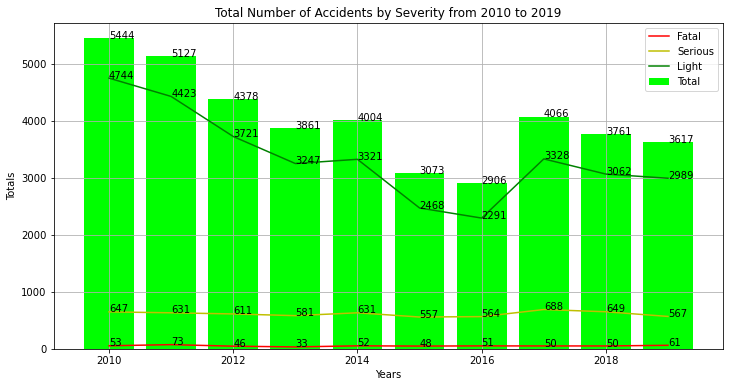

In [15]:
# plot with various axes scales
plt.figure(figsize=(12,6))
#plot total value
plt.bar(X,Y,color='lime',label='Total')
for a,b in zip(X,Y): 
    plt.text(a, b, str(b))
#plot 'Fatal' value    
plt.plot(x1,y1,color='r',label='Fatal')
for a,b in zip(x1,y1): 
    plt.text(a, b, str(b))
#plot Serious value    
plt.plot(x2,y2,color='y',label='Serious')
for a,b in zip(x2,y2): 
    plt.text(a, b, str(b))   
#plot Light value
plt.plot(x3,y3,color='g',label='Light')
for a,b in zip(x3,y3): 
    plt.text(a, b, str(b))     
plt.xlabel('Years')    
plt.ylabel('Totals')
plt.title('Total Number of Accidents by Severity from 2010 to 2019')
plt.legend(loc="upper right")
plt.grid(True)

If we consider 2010 as the base year, then we see there is a decrease trained in the number of accidents. However, the number of fatal accidents are remained constant throughout the period, a similar trend for serious accidents. For the severity type of 'light', there is a decreasing trend in the number of accidents. Also, we can see 2016 is the safest year and 2010 is the unsafe year of this decade for Greater Manchester.

#### Let's find out the total number of casualties by severity over the period from 2010 to 2019 for Greater manchester.

In [16]:
#let's group data by Year, and Severity and number of casualities
df_casu = df_acc[['Year','Severity','NumberCasualties']]
df_casu = df_casu.groupby(['Year','Severity'],axis=0).sum()
df_casu.reset_index(inplace=True)
#let's find total casualities
cond1 = df_casu['Severity'] == 1
cond2 = df_casu['Severity'] == 2
cond3 = df_casu['Severity'] == 3
x1 = np.array(df_casu[cond1]['Year'])
y1 = np.array(df_casu[cond1]['NumberCasualties'])
y1_avg = y1.mean().astype(int)
print('Total Fatal Casualities,/Year','\n',x1,'\n',y1)
print('Average Fatal Casualities is',y1_avg)
x2 = np.array(df_casu[cond2]['Year'])
y2 = np.array(df_casu[cond2]['NumberCasualties'])
y2_avg = y2.mean().astype(int)
print('Total Serious Casualities,/Year','\n',x2,'\n',y2)
print('Average Serious Casualities is',y2_avg)
x3 = np.array(df_casu[cond3]['Year'])
y3 = np.array(df_casu[cond3]['NumberCasualties'])
y3_avg = y3.mean().astype(int)
print('Total Light Casualities,/Year','\n',x3,'\n',y3)
print('Average Light Casualities is',y3_avg)

Total Fatal Casualities,/Year 
 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019] 
 [ 83 126  70  43  76  72  76  60  82  92]
Average Fatal Casualities is 78
Total Serious Casualities,/Year 
 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019] 
 [842 928 801 807 818 751 735 888 866 789]
Average Serious Casualities is 822
Total Light Casualities,/Year 
 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019] 
 [6662 6117 5187 4594 4741 3497 3144 4489 4078 4011]
Average Light Casualities is 4652


Let's plot these data for a better understanding.

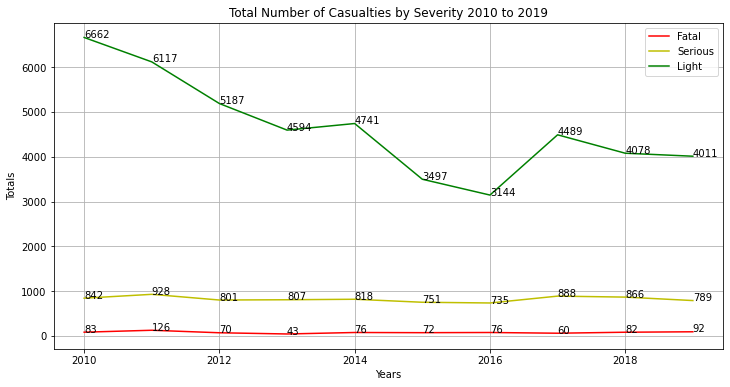

In [17]:
# let's plot with various axes scales
plt.figure(figsize=(12,6))
#plot fatal value
plt.plot(x1,y1,color='r',label='Fatal')
for a,b in zip(x1,y1): 
    plt.text(a, b, str(b))
#plot serious value    
plt.plot(x2,y2,color='y',label='Serious')
for a,b in zip(x2,y2): 
    plt.text(a, b, str(b))   
#plot light value    
plt.plot(x3,y3,color='g',label='Light')
for a,b in zip(x3,y3): 
    plt.text(a, b, str(b))     
plt.xlabel('Years')    
plt.ylabel('Totals')
plt.title('Total Number of Casualties by Severity 2010 to 2019')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

We see a similar trend in the total number of casualties over the year. The total number of casualties due to fatal and serious injuries remain constant over the year. However, there is a decreasing trend in the light type of injury. 

### Let's see accident severity and it's relationship with other categories for example Month, Day and Time.

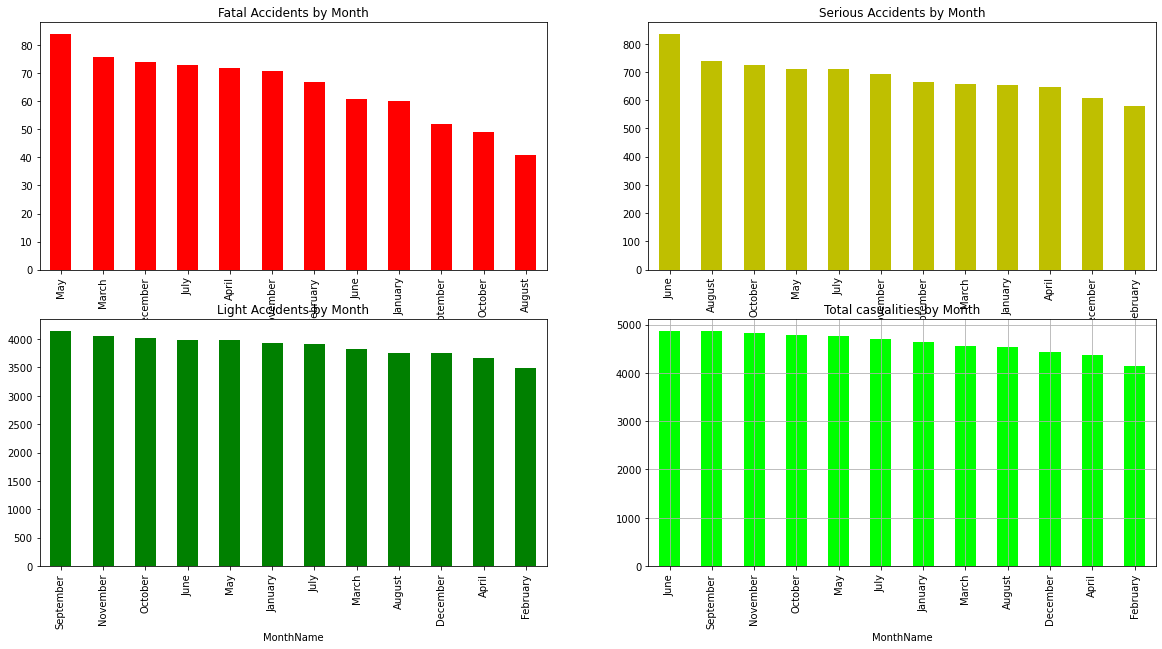

In [18]:
#Let's split dataset by accident severity
df_sev1 = df_acc[df_acc['Severity'] == 1]
df_sev2 = df_acc[df_acc['Severity'] == 2]
df_sev3 = df_acc[df_acc['Severity'] == 3]
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['MonthName'])['NumberCasualties'].sum().sort_values(ascending=False).plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Month')
#Serious
plt.subplot(222)
df_sev2.groupby(['MonthName'])['NumberCasualties'].sum().sort_values(ascending=False).plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Month')
#Light
plt.subplot(223)
df_sev3.groupby(['MonthName'])['NumberCasualties'].sum().sort_values(ascending=False).plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Month')
#All
plt.subplot(224)
df_acc.groupby(['MonthName'])['NumberCasualties'].sum().sort_values(ascending=False).plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Month')
plt.grid(True)
plt.show()

As we see in the above list, 'Fatal' accidents are high in May, followed by March and December. Similarly, 'Serious' accident is high in June followed by August and October. For severity type 'Light', high is in September followed by November and October. In the last decade for Manchester, the month of June is the most unsafe followed by September and November. On other hand, February is the safest month, followed by April and December. 

Let's see accident severity by day for Greater Manchester.

In [19]:
df_acc_days = df_acc[['Day','NumberCasualties']]
df_acc_days = df_acc_days.groupby(by=['Day'],axis=0).sum()
df_acc_days.reset_index(inplace=True)
X =np.array(df_acc_days['Day'])
Y = np.array(df_acc_days['NumberCasualties'])
df_acc_days.sort_values(['NumberCasualties'], ascending=False, axis=0).head(7)
df_acc_days['%Total']= (df_acc_days['NumberCasualties'] / df_acc_days['NumberCasualties'].sum()) * 100
df_acc_days['%Total']= df_acc_days['%Total'].round(decimals=2)
df_acc_days.sort_values(['NumberCasualties'], ascending=False, axis=0).head(7)

,Day,NumberCasualties,%Total
5,6,8767,15.79
4,5,8375,15.08
2,3,8124,14.63
3,4,7992,14.39
1,2,7817,14.08
6,7,7684,13.84
0,1,6766,12.19


We see here the number of casualties is higher on weekdays(60%) compare to weekends(40%). The highest number of casualties is on Friday(15%) and lowest on Sunday(13%).

In [20]:
df_acc_rel = df_acc[['Day','Severity','NumberCasualties']]
df_acc_rel = df_acc_rel.groupby(by=['Severity','Day'],axis=0).count()
df_acc_rel.reset_index(inplace=True)
df_acc_rel[['NumberCasualties']] = df_acc_rel[['NumberCasualties']].astype("int")
#Finding trend for total Casualties by day
df_sev_day1 = df_acc_rel[df_acc_rel['Severity'] == 1].sort_values(['Day'], ascending=True, axis=0)  
x1 = np.array(df_sev_day1['Day'])
y1 = np.array(df_sev_day1['NumberCasualties'])
df_sev_day1['%Total']= (df_sev_day1['NumberCasualties'] / df_sev_day1['NumberCasualties'].sum()) * 100
df_sev_day1['%Total']= df_sev_day1['%Total'].round(decimals=2)
df_sev_day1.sort_values(['NumberCasualties'], ascending=False, axis=0).head(7)

,Severity,Day,NumberCasualties,%Total
6,1,7,101,19.54
5,1,6,88,17.02
0,1,1,81,15.67
2,1,3,70,13.54
4,1,5,67,12.96
1,1,2,65,12.57
3,1,4,45,8.70


We see here 'Fatal' casualties are higher at weekends(52%) compare to weekdays(48%). The highest is on Saturday(19%) followed by Friday(17%) and Sunday(15%). The lowest is on Wednesday(8%), followed by Monday(12%) and Thursday(13%).

In [21]:
#Finding trend for total Casualties by day
df_sev_day2 = df_acc_rel[df_acc_rel['Severity'] == 2].sort_values(['Day'], ascending=True, axis=0)  
x2 = np.array(df_sev_day2['Day'])
y2 = np.array(df_sev_day2['NumberCasualties'])
df_sev_day2['%Total']= (df_sev_day2['NumberCasualties'] / df_sev_day2['NumberCasualties'].sum()) * 100
df_sev_day2['%Total']= df_sev_day2['%Total'].round(decimals=2)
df_sev_day2.sort_values(['NumberCasualties'], ascending=False, axis=0).head(7)

,Severity,Day,NumberCasualties,%Total
12,2,6,1043,17.03
11,2,5,939,15.33
10,2,4,880,14.37
9,2,3,852,13.91
13,2,7,824,13.45
8,2,2,821,13.40
7,2,1,767,12.52


We see here 'Serious' casualties are higher at weekdays(57%) compare to weekends(43%). However, the highest is on Friday(17%) followed by Thursday(15%) and Wednesday(14%). The lowest is on Sunday(12%), followed by Monday(13%) and Saturday(13%).

In [22]:
#Finding trend for total Casualties by day
df_sev_day3 = df_acc_rel[df_acc_rel['Severity'] == 3].sort_values(['Day'], ascending= True, axis=0)  
x3 = np.array(df_sev_day3['Day'])
y3 = np.array(df_sev_day3['NumberCasualties'])
df_sev_day3['%Total']= (df_sev_day3['NumberCasualties'] / df_sev_day3['NumberCasualties'].sum()) * 100
df_sev_day3['%Total']= df_sev_day3['%Total'].round(decimals=2)
df_sev_day3.sort_values(['NumberCasualties'], ascending=False, axis=0).head(7)

,Severity,Day,NumberCasualties,%Total
19,3,6,5353,15.93
18,3,5,5203,15.49
16,3,3,5201,15.48
17,3,4,5070,15.09
15,3,2,4810,14.32
20,3,7,4362,12.98
14,3,1,3595,10.70


We see here the number of 'Light' casualties is higher on weekdays(61%) compare to weekends(39%). The highest number of 'Light' casualties is on Friday(16%) and lowest on Sunday(10%).

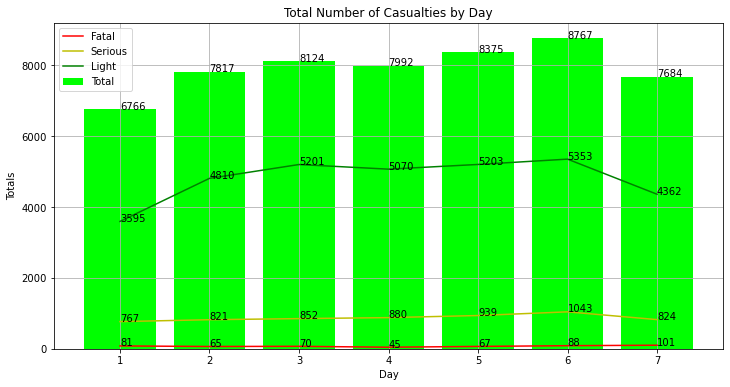

In [23]:
# plot with various axes scales
plt.figure(figsize=(12,6))
#plot total value
plt.bar(X,Y,color='lime',label='Total')
for a,b in zip(X,Y): 
    plt.text(a, b, str(b))
#plot 'Fatal' value    
plt.plot(x1,y1,color='r',label='Fatal')
for a,b in zip(x1,y1): 
    plt.text(a, b, str(b))
#plot Serious value    
plt.plot(x2,y2,color='y',label='Serious')
for a,b in zip(x2,y2): 
    plt.text(a, b, str(b))   
#plot Light value
plt.plot(x3,y3,color='g',label='Light')
for a,b in zip(x3,y3): 
    plt.text(a, b, str(b))     
plt.xlabel('Day')    
plt.ylabel('Totals')
plt.title('Total Number of Casualties by Day')
plt.legend(loc="best")
plt.grid(True)

P.S : Value descriptions are : (1,Sunday), (2,Monday), (3,Tuesday), (4,Wednesday), (5,Thursday), (6,Friday), (7,Saturday).

In the above graph, we can see here the safest day for Manchester is Sunday and the unsafe day is on Friday. Also, we can see 'Fatal' casualties are high on Saturday, 'Serious' and 'Light' is high on 'Friday'.

Let's find out accident casualties for Greater Manchester by 'Time'.

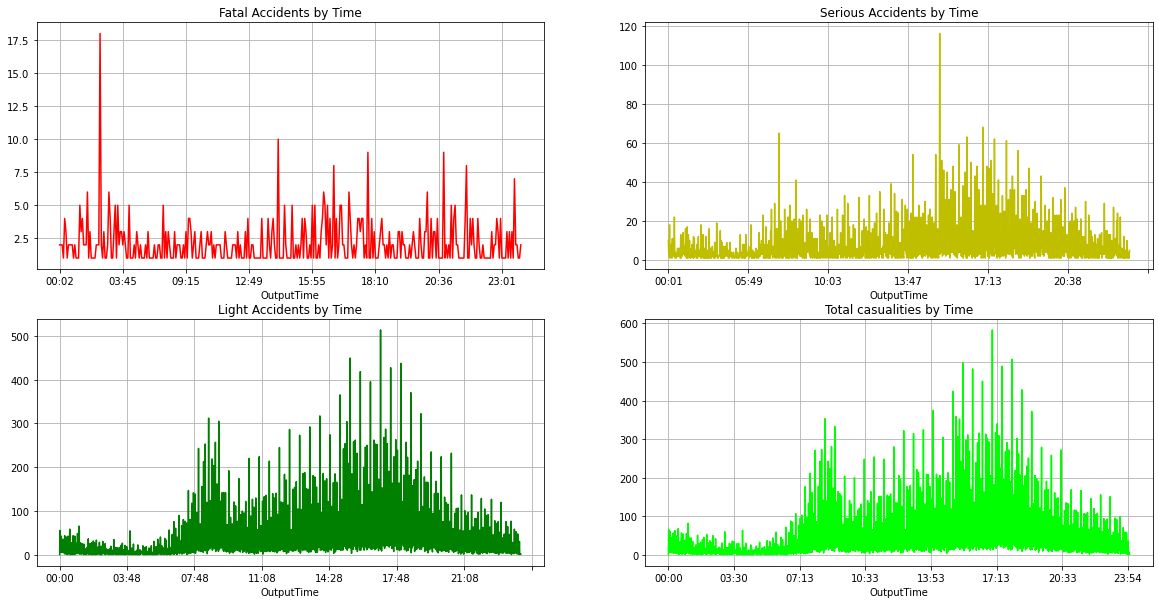

In [24]:
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['OutputTime'])['NumberCasualties'].sum().plot(stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Time')
plt.grid(True)
#Serious
plt.subplot(222)
df_sev2.groupby(['OutputTime'])['NumberCasualties'].sum().plot(stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Time')
plt.grid(True)
#Light
plt.subplot(223)
df_sev3.groupby(['OutputTime'])['NumberCasualties'].sum().plot(stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Time')
plt.grid(True)
#All
plt.subplot(224)
df_acc.groupby(['OutputTime'])['NumberCasualties'].sum().plot(stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Time')
plt.grid(True)
plt.show()

As we see in the above graph 'Fatal' casualties are high at midnight between 2 AM to 3 AM. Similarly, 'Serious' casualties are high in the afternoon between 3 PM to 6 PM. 'Light' casualties  are also high in the afternoon between 5 PM to 9 PM.
Overall casualties are high between 7 AM to 10 AM and later between 5 PM to 8 PM for Greater Manchester.

Let's find some of the other factors associate with casualties such as  Road Class, Carriageway, Speed Limit, Road Junction, Weather, Lighting, etc.

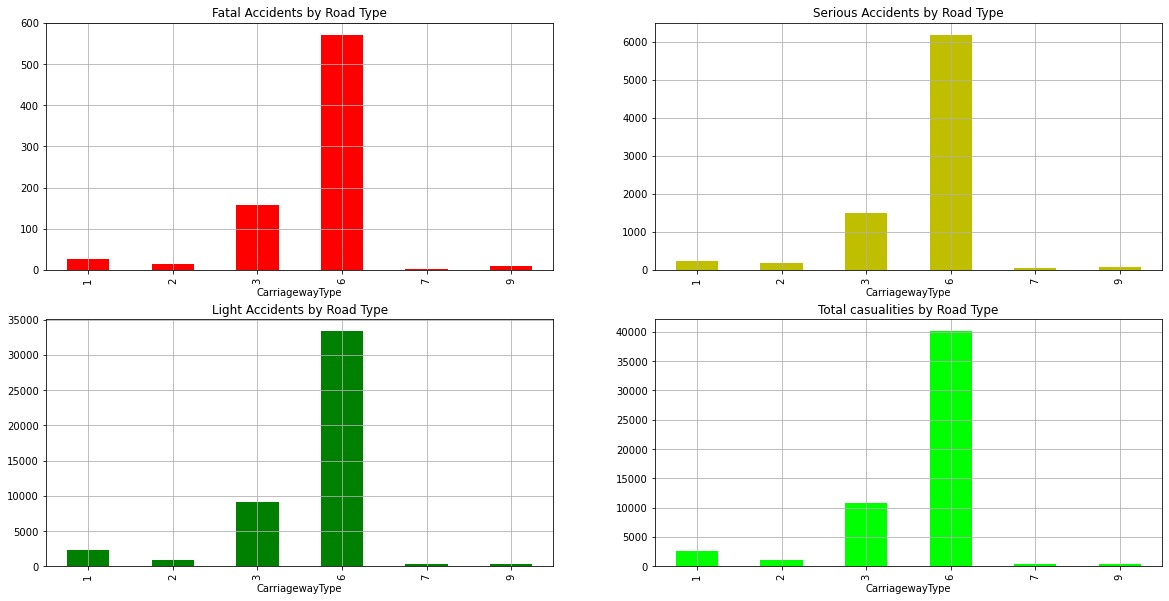

In [25]:
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['CarriagewayType'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Road Type')
plt.grid(True)
#Serious
plt.subplot(222)
df_sev2.groupby(['CarriagewayType'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Road Type')
plt.grid(True)
#Light
plt.subplot(223)
df_sev3.groupby(['CarriagewayType'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Road Type')
plt.grid(True)
#All
plt.subplot(224)
df_acc.groupby(['CarriagewayType'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Road Type')
plt.grid(True)
plt.show()

**P.S : Value descriptions are : (1,Roundabout),(2,One way street),(3,Dual carriageway),(6,Single carriageway),(7,Slip road),(9,Unknown).*


As we see in the above graph 'Fatal', 'Serious', and 'Light' casualties are high in Single Carriageway(6) followed by Dual Carriageway (3) and Roundabout(1). A similar trend for Overall casualties i.e, high for single followed by Dual and Roundabout for Greater Manchester.

Let's find out accident casualties for Greater Manchester by '1st Road Class'.

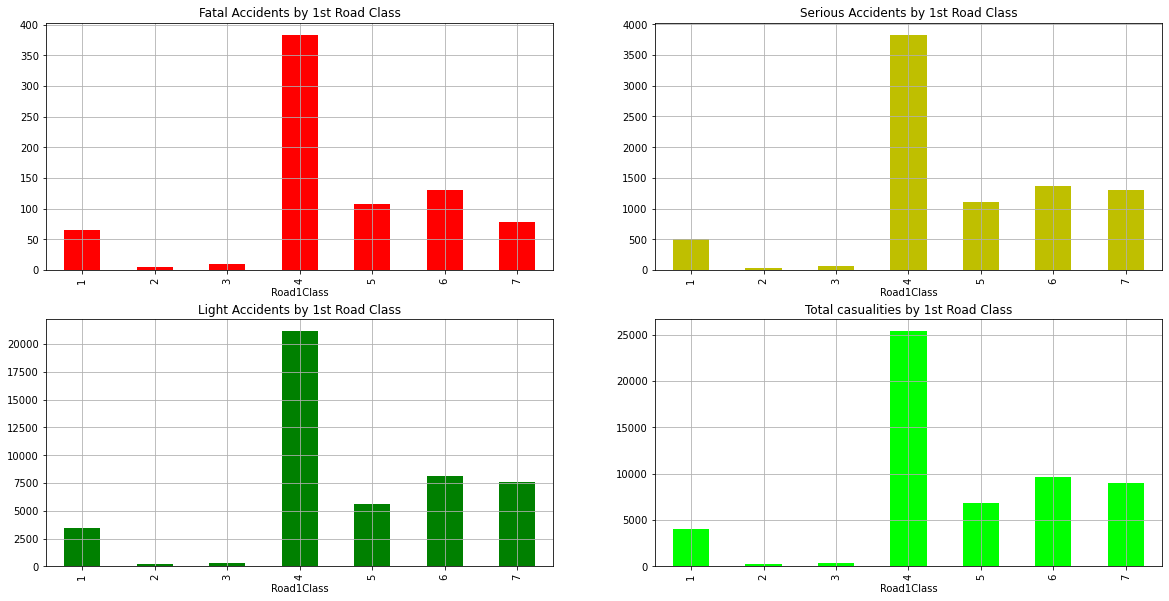

In [26]:
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['Road1Class'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by 1st Road Class')
plt.grid(True)
#Serious
plt.subplot(222)
df_sev2.groupby(['Road1Class'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by 1st Road Class')
plt.grid(True)
#Light
plt.subplot(223)
df_sev3.groupby(['Road1Class'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by 1st Road Class')
plt.grid(True)
#All
plt.subplot(224)
df_acc.groupby(['Road1Class'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by 1st Road Class')
plt.grid(True)
plt.show()

**P.S : Value descriptions are : (1,Motorway),(2,A(M)),(3,A),(4,B),(5,C),(6,Unclassified),(7,Unknown).*

As we see in the above graph 'Fatal', 'Serious', 'Light' casualties are significantly high in Road Class B(4) followed by Unclassified Carriageway(6). A similar trend for Overall casualties i.e, high in Road Class B(4) followed by Unclassified Carriageway(6) for Greater Manchester.

Let's find out accident casualties for Greater Manchester by 'Junction Detail'.

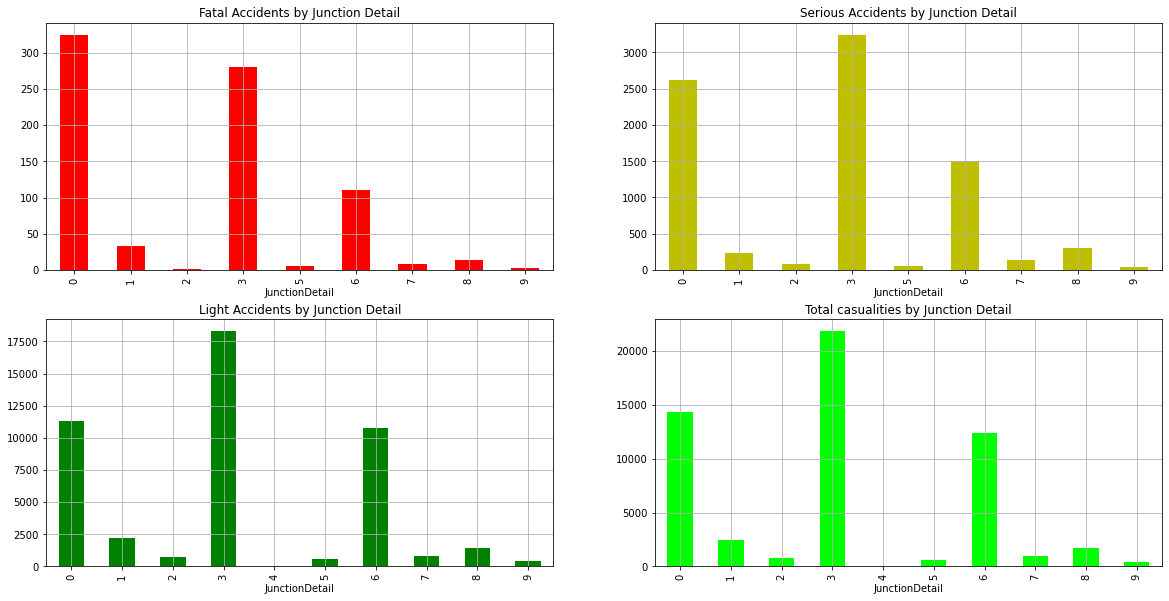

In [27]:
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['JunctionDetail'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Junction Detail')
plt.grid(True)
#Serious
plt.subplot(222)
df_sev2.groupby(['JunctionDetail'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Junction Detail')
plt.grid(True)
#Light
plt.subplot(223)
df_sev3.groupby(['JunctionDetail'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Junction Detail')
plt.grid(True)
#All
plt.subplot(224)
df_acc.groupby(['JunctionDetail'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Junction Detail')
plt.grid(True)
plt.show()

**P.S: Value descriptions are :(0, Not at or within 20 metres of junction),(1, Roundabout),(2, Mini roundabout,) (3, T or staggered junction),(5, Slip road),(6, Crossroads),(7, Junction more than four arms (not RAB)),(8, Using private drive or entrance),(9, Other junction)* 

As we see in the above graph casualties are significantly high in 'T or staggered junction' (41%) for Greater Manchester.

Let's find out accident casualties for Greater Manchester by 'Junction Control'.

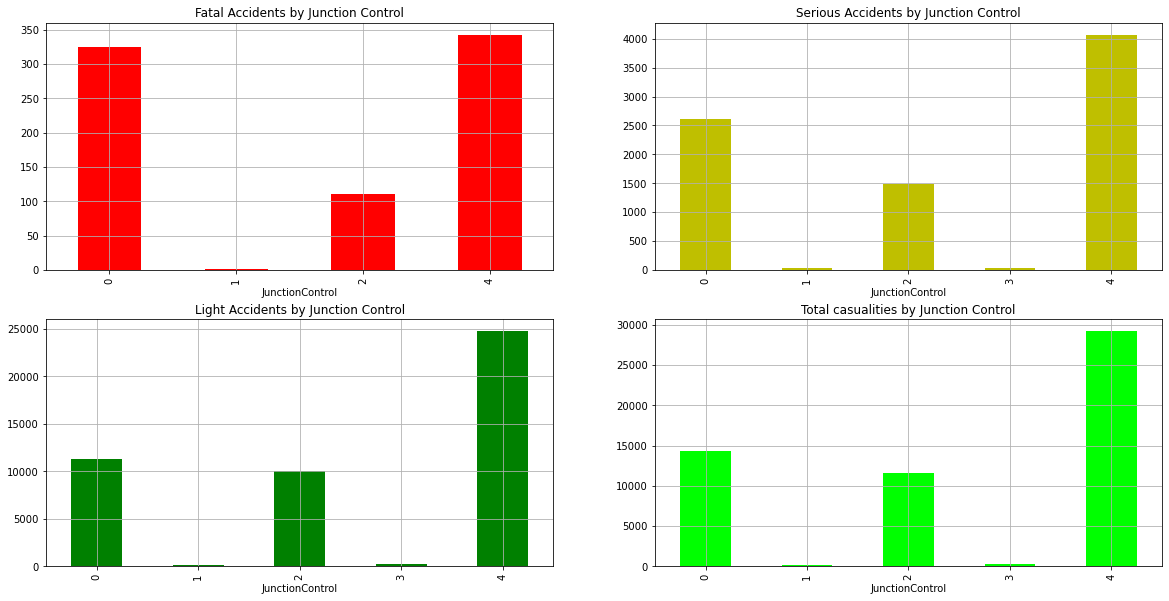

In [28]:
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['JunctionControl'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Junction Control')
plt.grid(True)
#Serious
plt.subplot(222)
df_sev2.groupby(['JunctionControl'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Junction Control')
plt.grid(True)
#Light
plt.subplot(223)
df_sev3.groupby(['JunctionControl'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Junction Control')
plt.grid(True)
#All
plt.subplot(224)
df_acc.groupby(['JunctionControl'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Junction Control')
plt.grid(True)
plt.show()

**P.S: Value descriptions are :(0, Unknown),(1, Authorised person ),(2, Automatic traffic signal) (3, Stop sign),(4, Give way or uncontrolled)* 

As we see in the above graph casualties are significantly high where there is no junction control(54%) in place with comparision to a control system(37%) for Greater Manchester.

Let's find out accident casualties for Greater Manchester by 'Speed Limit'.

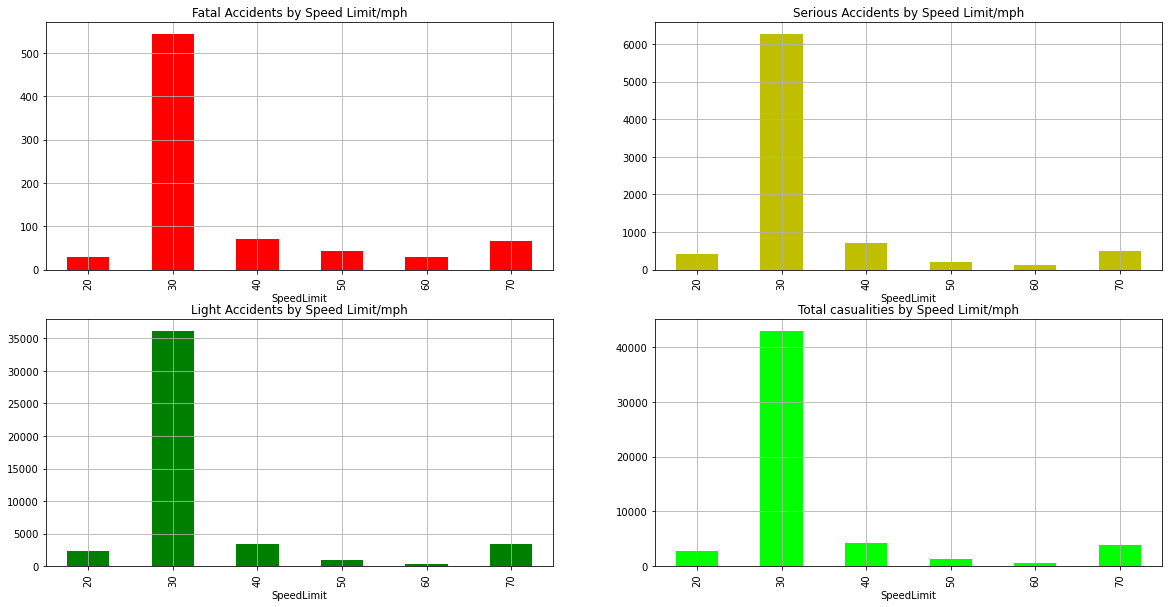

In [29]:
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['SpeedLimit'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Speed Limit/mph')
plt.grid(True)
#Serious
plt.subplot(222)
df_sev2.groupby(['SpeedLimit'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Speed Limit/mph')
plt.grid(True)
#Light
plt.subplot(223)
df_sev3.groupby(['SpeedLimit'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Speed Limit/mph')
plt.grid(True)
#All
plt.subplot(224)
df_acc.groupby(['SpeedLimit'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Speed Limit/mph')
plt.grid(True)
plt.show()

As we see in the above graph casualties are significantly high where the speed limit is 30 mph(80%) for Greater Manchester.

Let's find out accident casualties for Greater Manchester by 'Physical Crossing Facilities'.

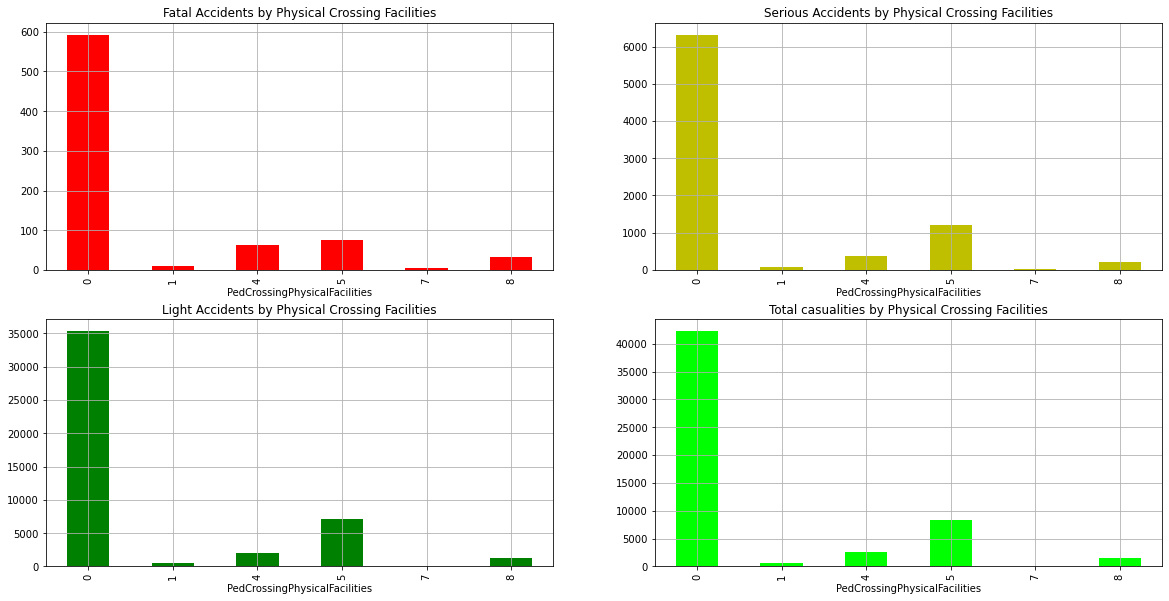

In [30]:
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['PedCrossingPhysicalFacilities'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Physical Crossing Facilities')
plt.grid(True)
#Serious
plt.subplot(222)
df_sev2.groupby(['PedCrossingPhysicalFacilities'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Physical Crossing Facilities')
plt.grid(True)
#Light
plt.subplot(223)
df_sev3.groupby(['PedCrossingPhysicalFacilities'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Physical Crossing Facilities')
plt.grid(True)
#All
plt.subplot(224)
df_acc.groupby(['PedCrossingPhysicalFacilities'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Physical Crossing Facilities')
plt.grid(True)
plt.show()

**P.S: Value descriptions are :(0, No physical crossing facility within 50m),(1, Zebra crossing),(4, Pelican, puffin, toucan or similar non-junction pedestrian light crossing) (5, Pedestrian phase at traffic signal junction),(7, Footbridge or subway ),(8,Central refuge — no other controls)* 

As we see in the above graph most of the casualties have occurred where there is no physical crossing(75%), however, around 15% of cases casualties have occurred at the traffic signal.  

Let's find out accident casualties for Greater Manchester by 'Lighting Condition'.

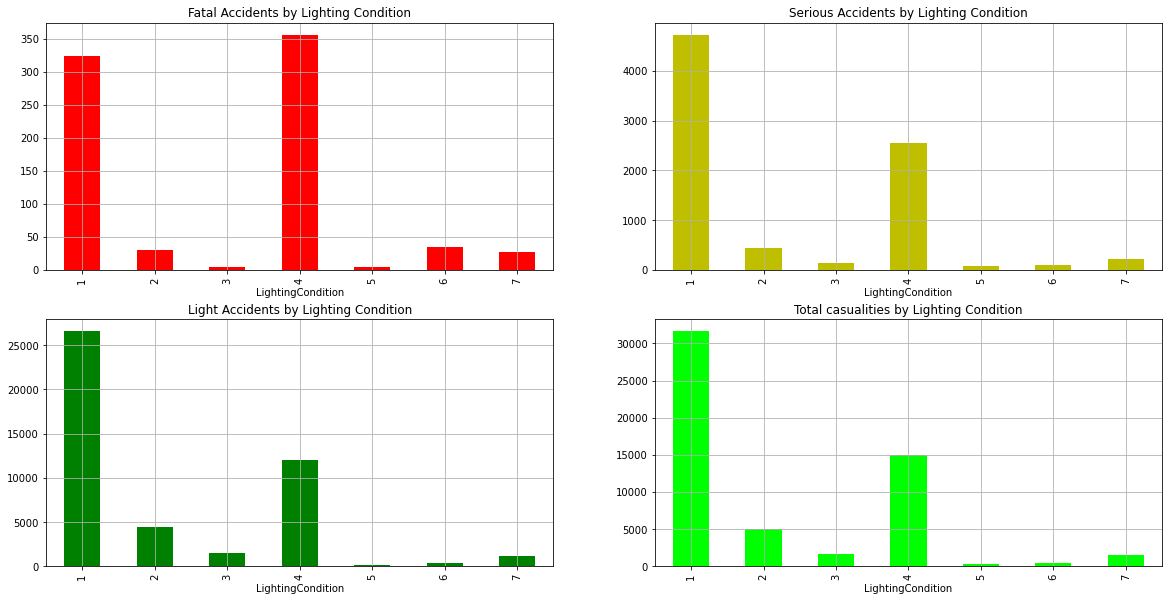

In [31]:
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['LightingCondition'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Lighting Condition')
plt.grid(True)
#Serious
plt.subplot(222)
df_sev2.groupby(['LightingCondition'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Lighting Condition')
plt.grid(True)
#Light
plt.subplot(223)
df_sev3.groupby(['LightingCondition'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Lighting Condition')
plt.grid(True)
#All
plt.subplot(224)
df_acc.groupby(['LightingCondition'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Lighting Condition')
plt.grid(True)
plt.grid(True)
plt.show()

**P.S: Value descriptions are :(1,2,3 - Daylight),(4, Darkness: street lights present and lit) (5, Darkness: street lights present but unlit),(6, Darkness: no street lighting),(7,Darkness: street lighting unknown)* 

As we see in the above graph most of the casualties have occurred in daylight(75%), however, around 25% of cases casualties have occurred where street lights present and lit.  

Let's find out accident casualties for Greater Manchester by 'Weather Condition'.

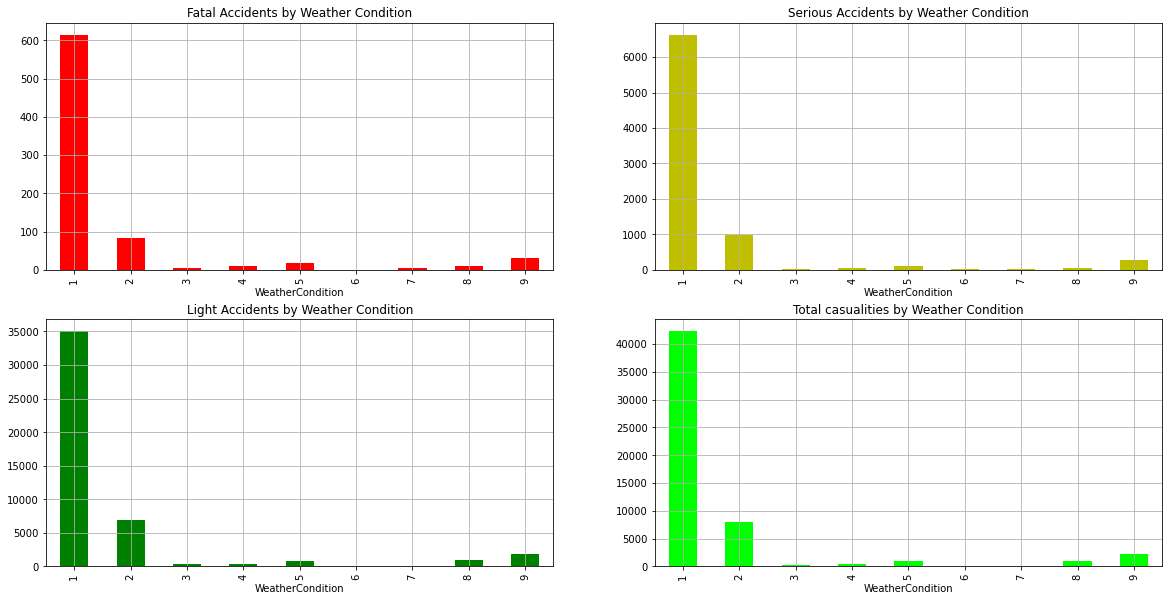

In [32]:
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_sev1.groupby(['WeatherCondition'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Weather Condition')
plt.grid(True)
#Serious
plt.subplot(222)
df_sev2.groupby(['WeatherCondition'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Weather Condition')
plt.grid(True)
#Light
plt.subplot(223)
df_sev3.groupby(['WeatherCondition'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Weather Condition')
plt.grid(True)
#All
plt.subplot(224)
df_acc.groupby(['WeatherCondition'])['NumberCasualties'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Weather Condition')
plt.grid(True)
plt.show()

**P.S: Value descriptions are :(1, Fine without high winds),(2, Raining without high winds) (3, Snowing without high winds ),(4, Fine with high winds),(5,Raining with high winds),(6,Snowing with high winds),(7,Fog or mist — if hazard),(8,Other),(9,Unknown)* 

As we see in the above graph most of the casualties have occurred in fine weather without high winds(76%), however, around 14% of cases casualties have occurred during rain without high winds.  

Let's find out accident casualties for Greater Manchester by other factors such as Sex, Age, Casualty Class, etc. 

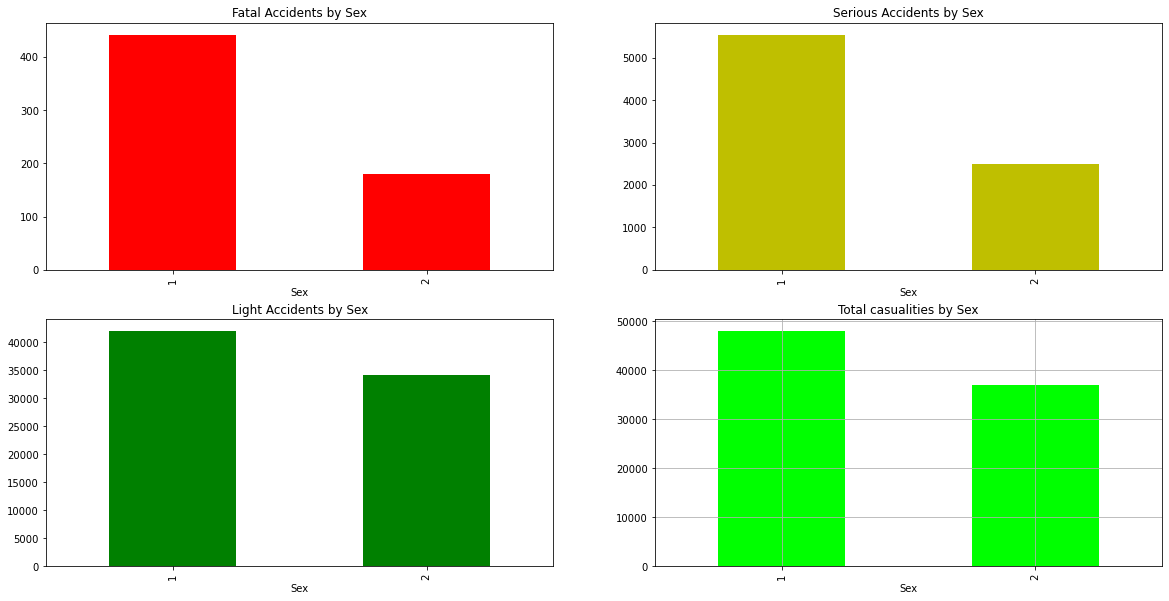

In [33]:
#Let's split dataset by accident severity
df_csev1 = df_cas[df_cas['CasualtySeverity'] == 1]
df_csev2 = df_cas[df_cas['CasualtySeverity'] == 2]
df_csev3 = df_cas[df_cas['CasualtySeverity'] == 3]
plt.figure(figsize=(12,6))
#Fatal
plt.subplot(221)
df_csev1.groupby(['Sex'])['CasualtyNumber'].sum().sort_values(ascending=False).plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Sex')
#Serious
plt.subplot(222)
df_csev2.groupby(['Sex'])['CasualtyNumber'].sum().sort_values(ascending=False).plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Sex')
#Light
plt.subplot(223)
df_csev3.groupby(['Sex'])['CasualtyNumber'].sum().sort_values(ascending=False).plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Sex')
#All
plt.subplot(224)
df_cas.groupby(['Sex'])['CasualtyNumber'].sum().sort_values(ascending=False).plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Sex')
plt.grid(True)
plt.show()

**P.S: Value descriptions are :(1,Male),(2, Female)* 

As we see in the above graph casualties are high for males (56%) and low for females (44%). 

Let's find out casualties by age group.  

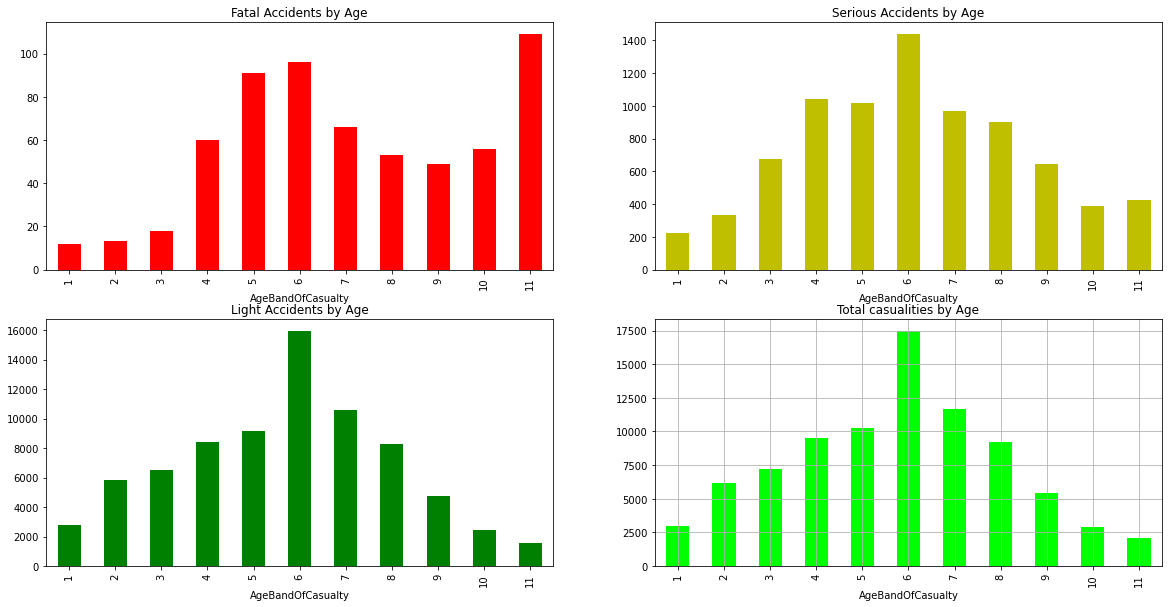

In [34]:
#Fatal
plt.subplot(221)
df_csev1.groupby(['AgeBandOfCasualty'])['CasualtyNumber'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Age')
#Serious
plt.subplot(222)
df_csev2.groupby(['AgeBandOfCasualty'])['CasualtyNumber'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Age')
#Light
plt.subplot(223)
df_csev3.groupby(['AgeBandOfCasualty'])['CasualtyNumber'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Age')
#All
plt.subplot(224)
df_cas.groupby(['AgeBandOfCasualty'])['CasualtyNumber'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Age')
plt.grid(True)
plt.show()

**P.S: Value descriptions are :(1,1 - 5),(2,6 - 10),(3,11 - 15),(4,16 - 20),(5,21 - 25),(6,26 - 35),(7,36 - 45),(8,46 - 55),(9,56 - 65),(10,66 - 75),(11,Over 75)* 

As we see in the above figure Fatal casualty is high for age group 75 above however, overall between age group, 26 to 35 accident casualties are the highest(20%).

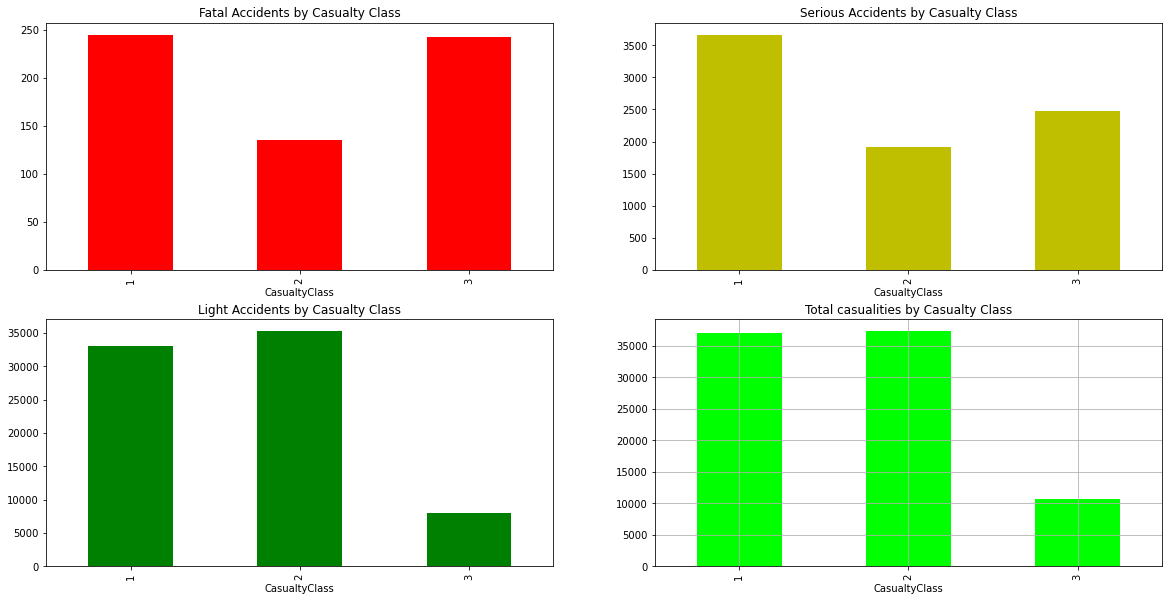

In [35]:
#Fatal
plt.subplot(221)
df_csev1.groupby(['CasualtyClass'])['CasualtyNumber'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='r')
plt.title('Fatal Accidents by Casualty Class')
#Serious
plt.subplot(222)
df_csev2.groupby(['CasualtyClass'])['CasualtyNumber'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='y')
plt.title('Serious Accidents by Casualty Class')
#Light
plt.subplot(223)
df_csev3.groupby(['CasualtyClass'])['CasualtyNumber'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='g')
plt.title('Light Accidents by Casualty Class')
#All
plt.subplot(224)
df_cas.groupby(['CasualtyClass'])['CasualtyNumber'].sum().plot(kind='bar',stacked=True,figsize=(20,10),color='lime')
plt.title('Total casualities by Casualty Class')
plt.grid(True)
plt.show()

**P.S: Value descriptions are :(1,Driver/Rider),(2,Veh./pillion Passenger),(3,Pedestrian )* 

As we see in the above figure Fatal casualty is equally high for both driver and pedestrian. However, overall casualties for drivers and passengers are the same and it is 80% of the total.

#### 2.2 Feature selection and Normalize Data

Let's summarize, based on the above data exploration and visualization we can strongly correlate accident severity with various factors for example day of the week, time, road type and carriageway, junction typer, weather condition, etc.

So now let's build a supervised machine learning model to predict the accident severity. We will start with the features selection.

In [36]:
#Convert Outputtime to integer
df_acc[['TimeHH','TimeMM']] = df_acc.OutputTime.str.split(":",expand=True) 
df_acc['TimeHH'].astype(int)

0        13
1        11
2        17
3        13
4         1
         ..
40232    14
40233    19
40234    21
40235    17
40236    13
Name: TimeHH, Length: 40237, dtype: int32

In [37]:
df_acc['TimeHH'] = df_acc['TimeHH'].astype(int)
df_acc.head()

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,Easting,Northing,...,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported,Month,MonthName,DayName,TimeHH,TimeMM
0,102262412010,2010,3,2,1,01/01/2010,6,13:10,382347,390025,...,1,4,0,0,1,1,January,Friday,13,10
1,102262562010,2010,3,2,1,01/01/2010,6,11:10,381892,390582,...,1,4,0,0,1,1,January,Friday,11,10
2,102264322010,2010,3,2,1,01/01/2010,6,17:30,385840,403134,...,1,2,0,0,2,1,January,Friday,17,30
3,107264182010,2010,3,3,1,01/01/2010,6,13:49,377762,403302,...,9,1,0,0,2,1,January,Friday,13,49
4,114261842010,2010,3,1,1,01/01/2010,6,01:55,355982,404620,...,9,1,0,0,2,1,January,Friday,1,55


In [38]:
Feature = ['Day','Road1Class','CarriagewayType','SpeedLimit','JunctionDetail','JunctionControl','Road2Class','PedCrossingHumanControl','LightingCondition','WeatherCondition','Month','TimeHH']

In [39]:
df_fe = df_acc[Feature]
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40237 entries, 0 to 40236
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day                      40237 non-null  int64
 1   Road1Class               40237 non-null  int64
 2   CarriagewayType          40237 non-null  int64
 3   SpeedLimit               40237 non-null  int64
 4   JunctionDetail           40237 non-null  int64
 5   JunctionControl          40237 non-null  int64
 6   Road2Class               40237 non-null  int64
 7   PedCrossingHumanControl  40237 non-null  int64
 8   LightingCondition        40237 non-null  int64
 9   WeatherCondition         40237 non-null  int64
 10  Month                    40237 non-null  int64
 11  TimeHH                   40237 non-null  int32
dtypes: int32(1), int64(11)
memory usage: 3.5 MB


#### Feature selection

In [40]:
X = df_fe
X[0:5]

,Day,Road1Class,CarriagewayType,SpeedLimit,JunctionDetail,JunctionControl,Road2Class,PedCrossingHumanControl,LightingCondition,WeatherCondition,Month,TimeHH
0,6,5,3,50,6,2,3,0,1,1,1,13
1,6,7,6,30,3,4,7,0,1,1,1,11
2,6,4,3,30,3,4,7,0,4,1,1,17
3,6,4,3,30,3,4,1,0,3,9,1,13
4,6,4,6,30,0,0,0,0,7,9,1,1


In [41]:
#lets select lables
y = df_acc['Severity'].values
y[0:5]

array([3, 3, 3, 3, 3], dtype=int64)

#### Normalize Data

In [42]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.98786133,  0.11329634, -1.38128524,  1.63499604,  1.20365736,
        -0.34914514, -0.54959878, -0.09155094, -0.73739017, -0.38345975,
        -1.61941089, -0.15401178],
       [ 0.98786133,  1.43103153,  0.50799255, -0.28951062, -0.04103928,
         0.84045248,  0.83968087, -0.09155094, -0.73739017, -0.38345975,
        -1.61941089, -0.54128623],
       [ 0.98786133, -0.54557125, -1.38128524, -0.28951062, -0.04103928,
         0.84045248,  0.83968087, -0.09155094,  1.18244214, -0.38345975,
        -1.61941089,  0.62053712],
       [ 0.98786133, -0.54557125, -1.38128524, -0.28951062, -0.04103928,
         0.84045248, -1.24423861, -0.09155094,  0.54249803,  3.7413242 ,
        -1.61941089, -0.15401178],
       [ 0.98786133, -0.54557125,  0.50799255, -0.28951062, -1.28573592,
        -1.53874276, -1.59155852, -0.09155094,  3.10227445,  3.7413242 ,
        -1.61941089, -2.47765849]])

In [43]:
#split data into test and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (26154, 12) (26154,)
Test set: (14083, 12) (14083,)


### 3. Machine Learning algorithms.

This is a classification problem as all the variables in the data set are categorical. Let's use following classification algorithm to build model and use various accuracy measure to evaluate it. 

   1. K Nearest Neighbor(KNN)
   2. Decision Tree
   3. Support Vector Machine
   4. Logistic Regression


#### 3.1. K Nearest Neighbor(KNN)

In [44]:
#let's build KNN model 

#let's find best K vale
Ks=10
KNN_acc = np.zeros((Ks-1))
for k in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_hat = neigh.predict(X_test)
    KNN_acc[k-1] = metrics.accuracy_score(y_test, y_hat)
#print the highest K
print( "The best accuracy was with", KNN_acc.max(), "with k=", KNN_acc.argmax()+1) 

The best accuracy was with 0.8279485904991835 with k= 9


In [45]:
#initialize k to 9 and predict
k=9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

Train set Accuracy:  0.8366215492850042


##### KNN Model Evaluation using Test set


In [46]:
y_knn = neigh.predict(X_test)
print("KNN Model Accuracy: ",'\n',"Metrics Accuracy: ", metrics.accuracy_score(y_test, y_knn),'\n','Jaccard_similarity_score: ', jaccard_score(y_test, y_knn,average="weighted"),'\n','F1-score: ',f1_score(y_test, y_knn,average="weighted"))
#let's find jaccard and F-score value to a data frame
# initialize list of lists 
data1 = [['KNN',jaccard_score(y_test, y_knn,average="weighted"),f1_score(y_test, y_knn,average="weighted"),'NA']] 
# add result to dataframe for summarization.  
df_score = pd.DataFrame(data1,columns = ['Algorithm','Jaccard','F1-score','LogLoss'])

KNN Model Accuracy:  
 Metrics Accuracy:  0.8279485904991835 
 Jaccard_similarity_score:  0.6950309684054108 
 F1-score:  0.7626832450161618


#### 3.2. Decision Tree

In [47]:
#create  DecisionTree object, set depth to 4
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#build model fit with trianing set
dtree.fit(X_train,y_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

Train set Accuracy:  0.8366215492850042


##### Decision Tree Model Evaluation using Test set

In [48]:
y_tree = dtree.predict(X_test)
print("Decision Tree Model Accuracy: ",'\n',"Metrics Accuracy: ", metrics.accuracy_score(y_test, y_tree),'\n','Jaccard Score: ', jaccard_score(y_test, y_tree,average="weighted"),'\n','F1-score: ',f1_score(y_test, y_tree,average="weighted"))
# initialize list of lists 
df_score.loc[1] = ['Decision Tree', jaccard_score(y_test,y_tree,average="weighted"),f1_score(y_test,y_tree,average="weighted"),'NA']

Decision Tree Model Accuracy:  
 Metrics Accuracy:  0.8361144642476745 
 Jaccard Score:  0.6990873973241758 
 F1-score:  0.7614856382176787


#### 3.3 Support Vector Machine(SVM)

In [49]:
#let's build fit
svm_cl = svm.SVC(kernel= 'rbf',gamma='auto') 
svm_cl.fit(X_train, y_train) 
#print accuracy score
print("SVM's Train set Accuracy: ", metrics.accuracy_score(y_train, svm_cl.predict(X_train)))

SVM's Train set Accuracy:  0.8342509749942647


###### SVM Model Evaluation using Test set

In [50]:
#let's predict
y_svm = svm_cl.predict(X_test)
print("SVM Model Accuracy: ",'\n',"Metrics Accuracy: ", metrics.accuracy_score(y_test, y_svm),'\n','Jaccard Score: ', jaccard_score(y_test, y_svm,average="weighted"),'\n','F1-score: ',f1_score(y_test, y_svm,average="weighted"))
# initialize list of lists 
df_score.loc[2] = ['SVM', jaccard_score(y_test,y_svm,average="weighted"),f1_score(y_test,y_svm,average="weighted"),'NA']

SVM Model Accuracy:  
 Metrics Accuracy:  0.8361144642476745 
 Jaccard Score:  0.6990873973241758 
 F1-score:  0.7614856382176787


#### 3.4 Logistic Regression

In [51]:
lr = LogisticRegression(random_state=0)
#let's do model fit 
lr.fit(X_train,y_train)
print("Logistic Regression's Train set Accuracy: ", metrics.accuracy_score(y_train, lr.predict(X_train)))

Logistic Regression's Train set Accuracy:  0.8342509749942647


##### Logistic Regression Model Evaluation using Test set

In [52]:
#let's predict
y_logr = lr.predict(X_test)
y_logr_prob = lr.predict_proba(X_test)
print("Logistic Regression Model Accuracy: ",'\n',"Metrics Accuracy: ", metrics.accuracy_score(y_test, y_logr),'\n','Jaccard Score: ', jaccard_score(y_test,y_logr,average="weighted"),'\n','F1-score: ',f1_score(y_test,y_logr,average="weighted"),'\n','Log Loss: ',log_loss(y_test,y_logr_prob))
# add evaluation to lists 
df_score.loc[3] = ['Logistic Regression', jaccard_score(y_test,y_logr,average="weighted"),f1_score(y_test,y_logr,average="weighted"),log_loss(y_test,y_logr_prob)]

Logistic Regression Model Accuracy:  
 Metrics Accuracy:  0.8361144642476745 
 Jaccard Score:  0.6990873973241758 
 F1-score:  0.7614856382176787 
 Log Loss:  0.48625105404152175


#### 3.5 Report

Now that we have completed building various models, let's summarize the accuracy of each model.

In [53]:
df_score.head()

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.695031,0.762683,NA
1,Decision Tree,0.699087,0.761486,NA
2,SVM,0.699087,0.761486,NA
3,Logistic Regression,0.699087,0.761486,0.486251


The model accuracy score for all the model are nearly the same. Hence whichever mode we select we can predict with an 83% accuracy score about the severity of accidents. 

### 4. Conclusion

Let' summarize.

1. In the last decade for Manchester there is a decrease trained in the number of accidents over the years. However, the total number of casualties due to fatal and serious injuries remain constant, and for severity type 'light', there is a decreasing trend.

2. The month of June is the most unsafe and February is the safest month for Manchester. 'Fatal' accidents are high in May, 'Serious' accidents are high in June and 'Light', accidents are high in September.

3. The number of casualties is higher on weekdays(60%) compare to weekends(40%). The highest number of casualties is on Friday(15%) and lowest on Sunday(13%). However, 'Fatal' casualties are high on Saturday, 'Serious' and 'Ligh casualties are high on 'Friday'. Overall the safest day for Manchester is Sunday and the unsafe day is on Friday.

4. We also noticed that 'Fatal' casualties are high at midnight between 2 AM to 3 AM, 'Serious' casualties are high in the afternoon between 3 PM to 6 PM and 'Light' casualties are high in the evening between 5 PM to 9 PM. Overall casualties are high between 7 AM to 10 AM and later between 5 PM to 8 PM.

5. With respect to road type and carriageway, 'Fatal', 'Serious', and 'Light' casualties are high in Single Carriageway followed by Dual Carriageway and Roundabout. With respect to Road Class, we observed 'Fatal', 'Serious', 'Light' casualties are significantly high in road Class B followed by unclassified carriageway. Casualties are significantly high in 'T or staggered junction' (41%) and where there is no junction control(54%) in place.

6. Casualties are high in daylight(75%), compared to darkness. casualties are significantly high where the speed limit is 30 mph(80%) compare over 70 mph.

7. Similarly, casualties are high in fine weather around 76%, compare to cases that occurred during rain (14%) or other adverse weather condition.

8. We also observed casualties are high in males (56%) than females (44%). Similarly, casualties are high in the age group 26 to 45 around 33%. Overall casualties for drivers and passengers are 80% of the total compare to 20% for the pedestrian.

9. Based on the above analysis, we have selected various features and build a supervised machine learning model. This model can  able to predict with 83% accuracy about the severity of accidents

##### 4.1 Recommendation to target audience

##### Visitors or Residence Self Driving in Manchester
1. Please be careful while driving between 7 AM to 10 AM and later between 5 PM to 8 PM. There is a higher probability of accidents during this period.
2. Fatal casualties are highest at the midnight between 2 AM to 3 AM, so please try to avoid driving in late-night or at least be extra careful during driving.
3. Please be careful in T junction, and be extra alert in those junctions where there is no human or physical control in place.   
        

#### Rent a Car Companies or Insurance agencies

1. Your customers might be complacent during fine weather or in the daytime and likely careless while driving or choosing an insurance product. But as we observed casualties are high in fine weather or daylight. So please advise your customer accordingly.

2. Alternatively do not misguide or overcharged customers during bad weather or darkness. As we observed bad weather is a significantly less contributing factor for casualties.

3. The age group between 26 to 45 is at high chances of getting into a fatal or serious casualty. Hence, please provide all the necessary help in educating the customer group between the ages of 26 to 45 about safe driving.

#### Government agencies 

1. We observed that single carriageways are more vulnerable for casualties, wherever possible identify those roads and place enough safety measures.

2. Identify T junction where casualties are high and if possible install some physical or human control to minimize casualties.

3. It seems people are not observing speed limit specific to places where it is 30 mph. If possible bring in more major in those places to minimize casualties.

#### 4.2 Further Study

1. Further study is needed to map the Easting and Nothing coordinate to identify places that are contributing casualties.  

2. Due to limitations on the dataset not able to find out how the negligence of drivers or pedestrians is factoring casualties. To solve it we may need to reach out to the city authority to provide details about the same.

### 5. References and Appendix

[Coursera](https://www.coursera.org) 

[Similar Study](https://www.kaggle.com/phip2014/ml-to-predict-accident-severity-pa-mont)

[Other blog on driving in UK](https://www.visitbritainshop.com/world/articles/guide-to-driving-in-the-uk/)

[UK Road Classification](https://www.eastriding.gov.uk/environment/roads-streets-traffic-and-parking/roads-pavements-and-traffic/classification-of-roads/#primary-route-network)
